<a href="https://colab.research.google.com/github/Mayuri1010/Car_Price_Prediction/blob/main/Cars_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder   #for preprocessing of data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression   #for regression model implementation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV # for hyper parameter tunning 

from sklearn.metrics import r2_score #FOR FINDING THE ACCURACY OF MODEL

In [ ]:
df=pd.read_csv('cars.csv')
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [ ]:
df.info()   #To get a quick overview of the dataset we use the df.info() function.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [ ]:
df.describe()  # It is used to view some basic statistical details like count(),mean,std & max value of dataframe.

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isna().sum()  #df.isna() function is used to detect missing values.

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

**normalized losses & horsepower has type [object] that type have to be in [integer] form**

In [ ]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

**Handling Missing Values**

In [ ]:
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["horsepower"].replace("?",np.nan,inplace=True)

df["normalized-losses"]=df["normalized-losses"].astype("float")
df["horsepower"]=df["horsepower"].astype("float")

nmean=df["normalized-losses"].mean()
hmean=df["horsepower"].mean()

df["normalized-losses"].fillna(nmean,inplace=True)    #fillna() method replaces the NULL values with a specified value.
df["horsepower"].fillna(hmean,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


In [ ]:
df["horsepower"].value_counts()

68.000000     19
70.000000     11
69.000000     10
116.000000     9
110.000000     8
95.000000      7
88.000000      6
62.000000      6
101.000000     6
160.000000     6
114.000000     6
84.000000      5
97.000000      5
102.000000     5
145.000000     5
82.000000      5
76.000000      5
111.000000     4
92.000000      4
123.000000     4
86.000000      4
90.000000      3
73.000000      3
85.000000      3
207.000000     3
182.000000     3
121.000000     3
152.000000     3
112.000000     2
56.000000      2
161.000000     2
156.000000     2
94.000000      2
52.000000      2
104.256158     2
162.000000     2
155.000000     2
184.000000     2
100.000000     2
176.000000     2
55.000000      1
262.000000     1
134.000000     1
115.000000     1
140.000000     1
48.000000      1
58.000000      1
60.000000      1
78.000000      1
135.000000     1
200.000000     1
64.000000      1
120.000000     1
72.000000      1
154.000000     1
288.000000     1
143.000000     1
142.000000     1
175.000000    

In [ ]:
df["normalized-losses"].value_counts()

122.0    45
161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
65.0      5
94.0      5
168.0     5
106.0     4
148.0     4
118.0     4
93.0      4
83.0      3
101.0     3
115.0     3
154.0     3
125.0     3
137.0     3
108.0     2
87.0      2
119.0     2
194.0     2
197.0     2
89.0      2
158.0     2
192.0     2
113.0     2
188.0     2
81.0      2
110.0     2
145.0     2
129.0     2
164.0     2
153.0     2
186.0     1
107.0     1
78.0      1
231.0     1
77.0      1
142.0     1
98.0      1
121.0     1
90.0      1
256.0     1
Name: normalized-losses, dtype: int64

**Checking Outliers**

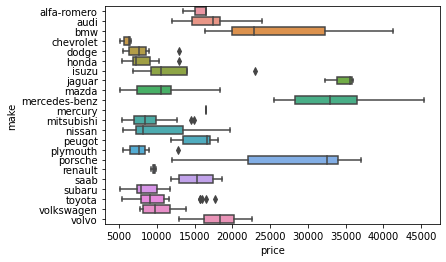

In [ ]:
sns.boxplot(data=df, x='price', y='make')  #Boxplot is also used to identify the outliers in dataset.
                                           #here we can see the Outliers.

**checking outliers and droping the outliers**

In [ ]:
df[(df['make']=='isuzu') & (df['price']>20000)]  
df[(df['make']=='dodge') & (df['price']>11000)]
df[(df['make']=='honda') & (df['price']>12000)]
df[(df['make']=='mitsubishi') & (df['price']>12000)]
df[(df['make']=='toyota') & (df['price']>13000)]
df[(df['make']=='plymouth') & (df['price']>11000)]


df.drop(45, inplace=True) 
df.drop(29, inplace=True)
df.drop(41, inplace=True)
df.drop([82,83,84], inplace=True)
df.drop(124, inplace=True)
df.drop([172,178,179,180,181], inplace=True)

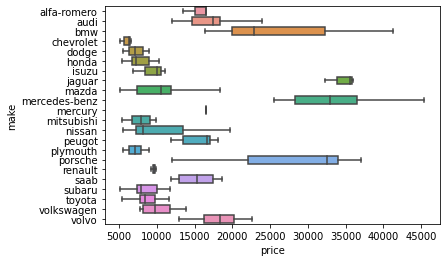

In [ ]:
sns.boxplot(data=df, x='price', y='make')   # here we drop the outliers

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


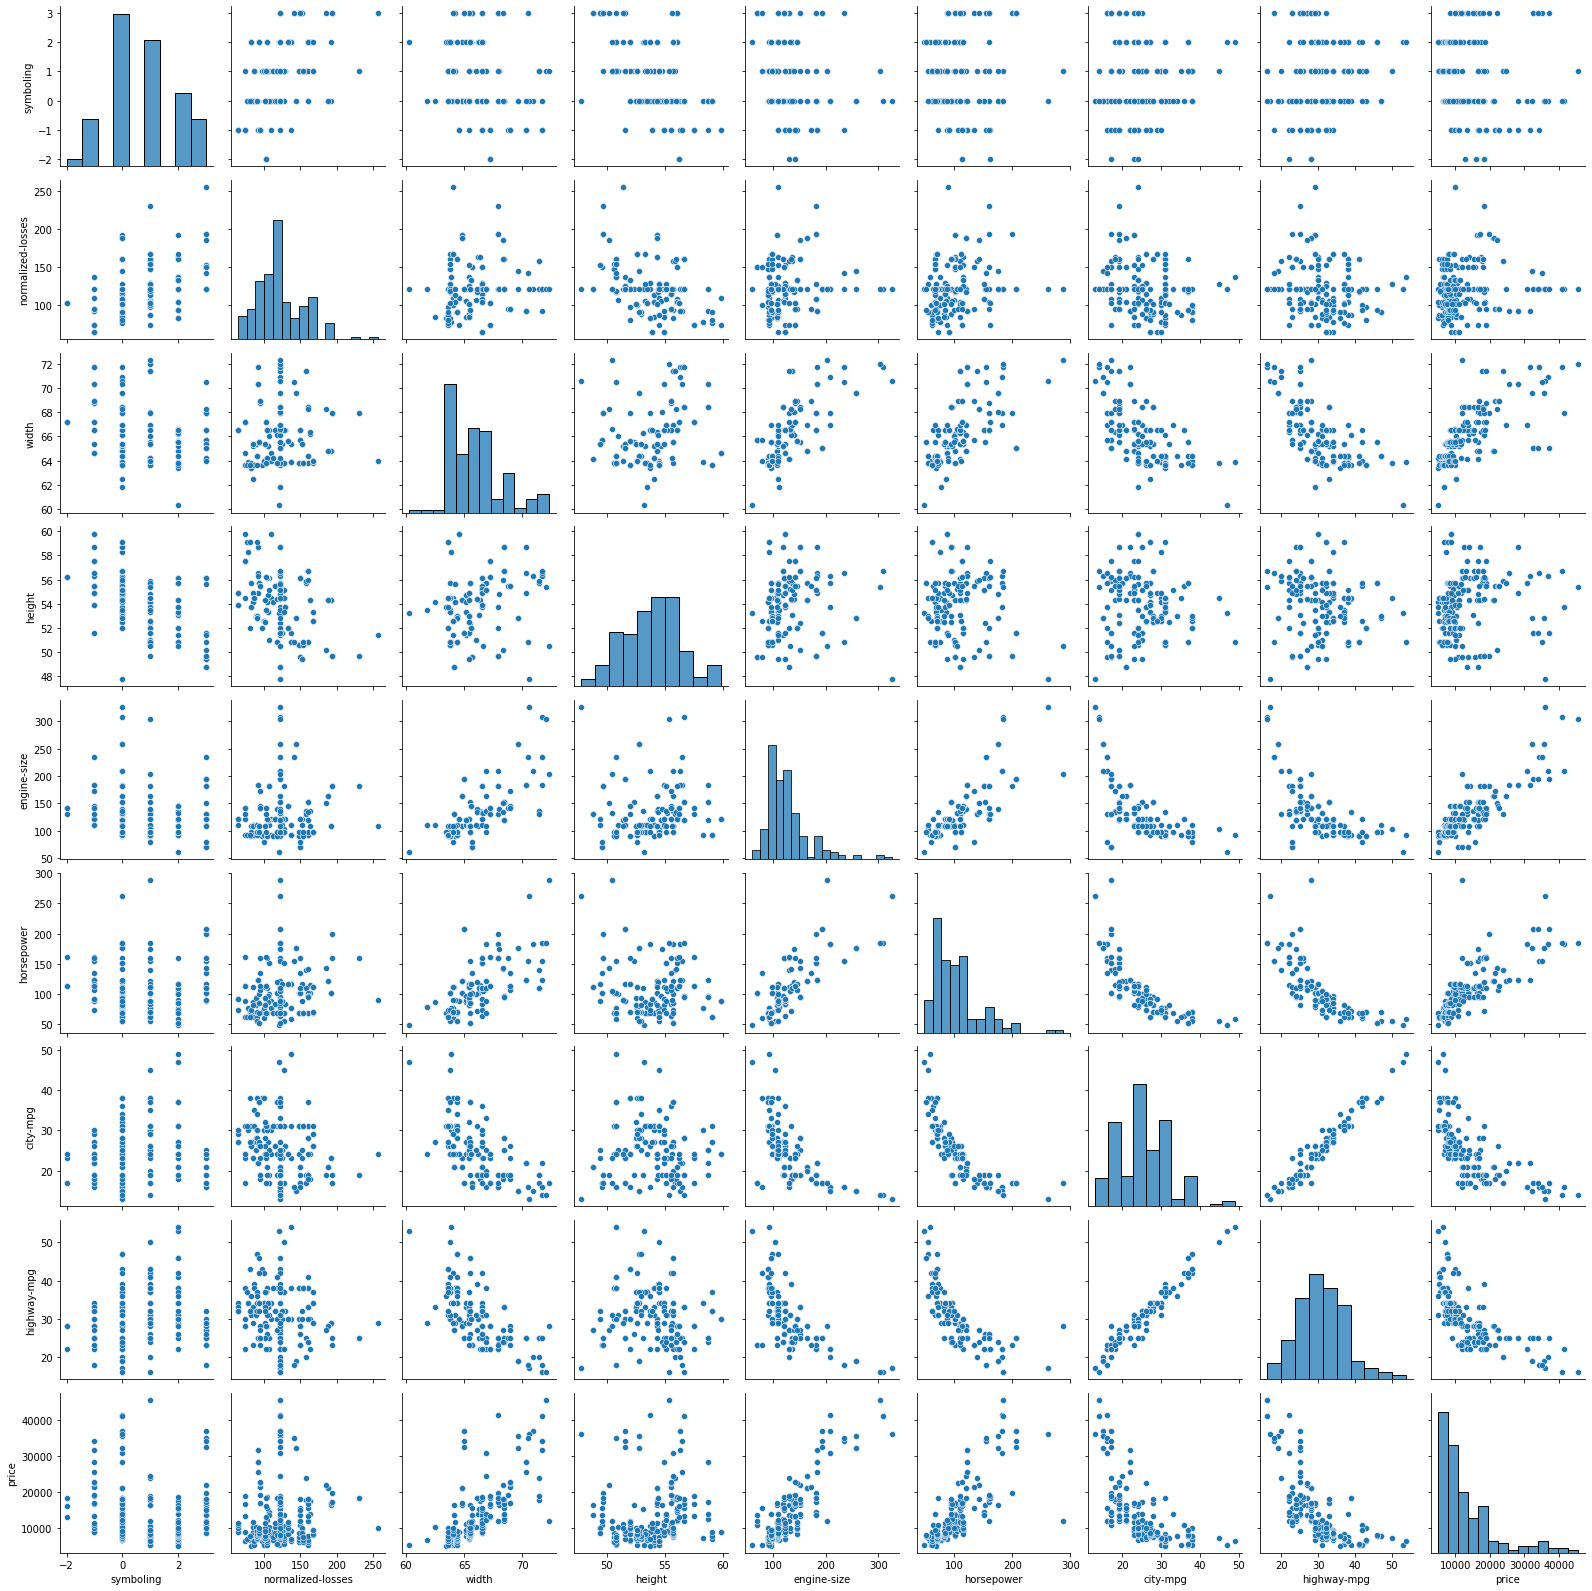

In [ ]:
sns.pairplot(data=df)

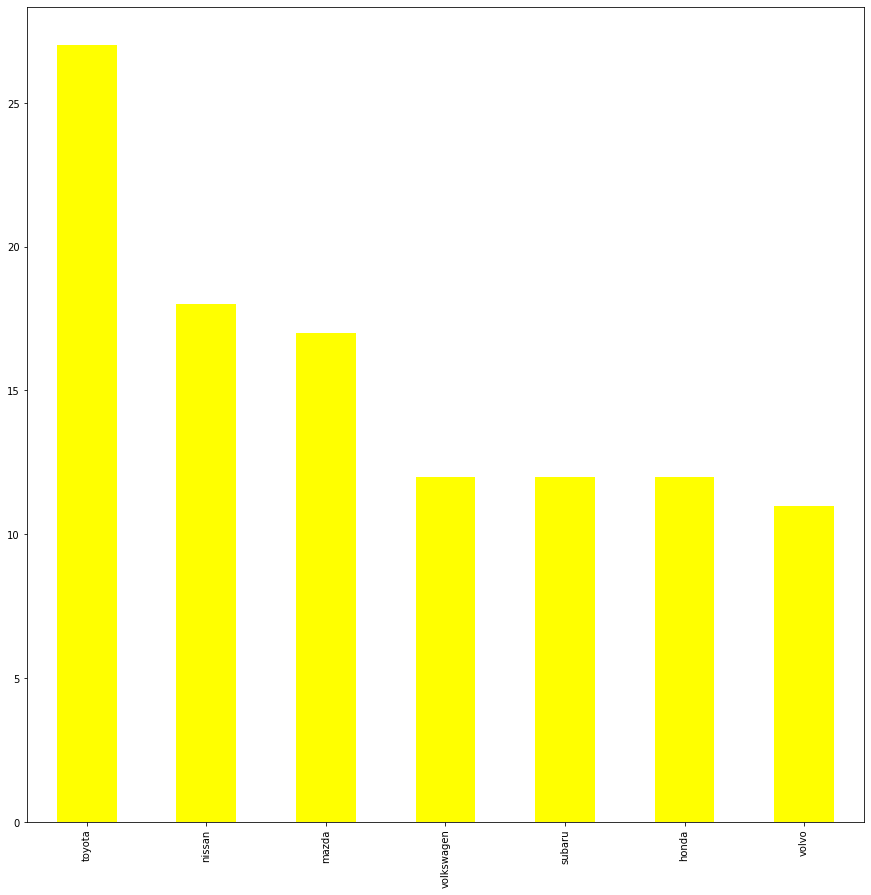

In [ ]:
plt.figure(figsize=(15,15))
df.make.value_counts().head(7).plot(kind="bar",color='yellow')

**Encoding**

In [ ]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

In [ ]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [ ]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [ ]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [ ]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [ ]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


In [ ]:
df=pd.concat([df_cat,df_num],axis=1)

In [ ]:
df   #this is the final dataset after encoding

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,21,1,3,2,0,3,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,21,1,3,2,0,5,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,21,0,3,2,0,3,-1,95.0,68.9,55.5,145,106.0,26,27,22470


**Scalling the Dataset**

In [ ]:
for col in df:
    sc=StandardScaler()
    df[col]=sc.fit_transform(df[[col]])

In [ ]:
df

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,-1.930113,0.340010,-3.112000,1.229517,-0.125656,-3.103277,1.867513,0.019137,-0.817748,-2.071007,0.107874,0.224311,-0.680796,-0.585808,0.050194
1,-1.930113,0.340010,-3.112000,1.229517,-0.125656,-3.103277,1.867513,0.019137,-0.817748,-2.071007,0.107874,0.224311,-0.680796,-0.585808,0.422324
2,-1.930113,0.340010,-0.752016,1.229517,-0.125656,1.938242,0.187187,0.019137,-0.178224,-0.591990,0.631937,1.321612,-0.987075,-0.731505,0.422324
3,-1.771124,0.340010,0.427976,-0.568186,-0.125656,-0.078366,1.027350,1.356450,0.141538,0.188602,-0.392369,-0.005357,-0.221378,-0.148717,0.106540
4,-1.771124,0.340010,0.427976,-2.365889,-0.125656,-0.078366,1.027350,1.356450,0.232898,0.188602,0.250800,0.326386,-1.140215,-1.314294,0.539969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.408661,0.340010,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.840563,1.374905,0.681608,0.369905,0.300867,-0.374517,-0.440111,0.465048
201,1.408661,0.340010,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.840563,1.329225,0.681608,0.369905,1.474724,-0.987075,-0.877202,0.737489
202,1.408661,0.340010,0.427976,1.229517,-0.125656,1.938242,-1.493140,-0.840563,1.374905,0.681608,1.132180,0.811240,-1.140215,-1.168596,1.039652
203,1.408661,-2.941088,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.840563,1.374905,0.681608,0.465190,0.096718,0.084901,-0.585808,1.161631


**Model Building**

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
x

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,-1.930113,0.340010,-3.112000,1.229517,-0.125656,-3.103277,1.867513,0.019137,-0.817748,-2.071007,0.107874,0.224311,-0.680796,-0.585808
1,-1.930113,0.340010,-3.112000,1.229517,-0.125656,-3.103277,1.867513,0.019137,-0.817748,-2.071007,0.107874,0.224311,-0.680796,-0.585808
2,-1.930113,0.340010,-0.752016,1.229517,-0.125656,1.938242,0.187187,0.019137,-0.178224,-0.591990,0.631937,1.321612,-0.987075,-0.731505
3,-1.771124,0.340010,0.427976,-0.568186,-0.125656,-0.078366,1.027350,1.356450,0.141538,0.188602,-0.392369,-0.005357,-0.221378,-0.148717
4,-1.771124,0.340010,0.427976,-2.365889,-0.125656,-0.078366,1.027350,1.356450,0.232898,0.188602,0.250800,0.326386,-1.140215,-1.314294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.408661,0.340010,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.840563,1.374905,0.681608,0.369905,0.300867,-0.374517,-0.440111
201,1.408661,0.340010,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.840563,1.329225,0.681608,0.369905,1.474724,-0.987075,-0.877202
202,1.408661,0.340010,0.427976,1.229517,-0.125656,1.938242,-1.493140,-0.840563,1.374905,0.681608,1.132180,0.811240,-1.140215,-1.168596
203,1.408661,-2.941088,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.840563,1.374905,0.681608,0.465190,0.096718,0.084901,-0.585808


In [ ]:
y

0      0.050194
1      0.422324
2      0.422324
3      0.106540
4      0.539969
         ...   
200    0.465048
201    0.737489
202    1.039652
203    1.161631
204    1.180826
Name: price, Length: 193, dtype: float64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(r2_score(ytest,ypred)*100)

In [ ]:
model_list=[]
model_list.append(("LinearRegression--",LinearRegression()))
model_list.append(("Decision Tree--",DecisionTreeRegressor(random_state=3)))
model_list.append(("Random Forest--",RandomForestRegressor(random_state=4)))
for name,model in model_list:
    print(name)
    mymodel(model)
    print()

LinearRegression--
74.88166774679833

Decision Tree--
77.30091426538193

Random Forest--
75.6184306780988



**Hyper parameter Tunning for Random Forest**

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [70,80, 90, 100,110],
    'max_features': [2, 3,4],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [6,8, 10, 12],
    'n_estimators': [100, 200, 300, 50]
}
rf = RandomForestRegressor()
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
#grid.fit(x, y)

In [ ]:
#grid.best_params_

In [ ]:
model_list=[]  # hyperparamter tuning
model_list.append(("Random Forest--",RandomForestRegressor(bootstrap= True,max_depth= 90,max_features=4,min_samples_leaf= 3,min_samples_split= 6,n_estimators=50,random_state=2)))

for name,model in model_list:
    print(name)
    mymodel(model)
    print()

Random Forest--
81.29775187588436



**Conclusion: After hyperparameter tunning I conclude that accuracy is increased**

**Result:**

**Before Tunning: 0.756184306780988**

**After Tunning : 0.8129775187588436**